# Agrupamento e análise dos dados - Abril 2021


In [1]:
# Importar libs 
# Importar separado libs e dataframe,para que caso seja necessario incluir novas libs, 
# não precise carregar o arquivo novamente

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# plt.rcParams.update({'figure.figsize': (10,8), 'figure.dpi': 80})

In [15]:
# link dos dados: http://dadosabertos.c3sl.ufpr.br/curitiba/Sigesguarda/
# Carregar dataframe:

df = pd.read_csv("../dados/dados_limpos/base_limpa_abril_2015_2021.csv", sep=',', encoding="latin-1", low_memory=False)
df['OCORRENCIA_DATA'] = pd.to_datetime(df['OCORRENCIA_DATA'])
df['OCORRENCIA_HORA'] = pd.to_datetime(df['OCORRENCIA_HORA'])
df = df[df['OCORRENCIA_DATA'].dt.year >= 2015]
df.head()

,ATENDIMENTO_ANO,BAIRRO,LOCAL_PUBLICO,RUA,DESCRICAO1,DESCRICAO2,SUBCATEGORIA,OCORRENCIA_ANO,OCORRENCIA_MES,OCORRENCIA_DATA,OCORRENCIA_HORA,OCORRENCIA_DIA_SEMANA,ORIGEM_CHAMADO_DESCRICAO,REGIONAL,QTDE
0,2015,ABRANCHES,NÃO INFORMADO,CARMELINA CAVASSIN,Disparo de arma,NÃO INFORMADO,Disparo de arma por GM com munição letal,2015,1,2015-01-01 00:26:00,2021-05-02 00:26:00,QUINTA,153,BOA VISTA,1
1,2015,ALTO DA RUA XV,NÃO INFORMADO,CAMÕES,Animais,NÃO INFORMADO,Cão solto em via pública,2015,1,2015-01-01 00:45:00,2021-05-02 00:45:00,QUINTA,153,MATRIZ,1
2,2015,PRADO VELHO,NÃO INFORMADO,GUABIROTUBA,Apoio,NÃO INFORMADO,Apoio à PMPR,2015,1,2015-01-01 00:56:00,2021-05-02 00:56:00,QUINTA,153,MATRIZ,1
3,2015,CAMPINA DO SIQUEIRA,TERMINAL CAMPINA DO SIQUEIRA,PADRE ANCHIETA,Explosão,NÃO INFORMADO,NÃO INFORMADO,2015,1,2015-01-01 01:08:00,2021-05-02 01:08:00,QUINTA,153,SANTA FELICIDADE,1
4,2015,XAXIM,ESTAÇÃO TUBO SÃO PEDRO,BR CENTO E DEZESSEIS,Roubo,NÃO INFORMADO,Transporte Coletivo,2015,1,2015-01-01 00:01:00,2021-05-02 00:01:00,QUINTA,153,BOQUEIRÃO,1


In [46]:
df['OCORRENCIA_DATA'].dt.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137150 entries, 0 to 137149
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ATENDIMENTO_ANO           137150 non-null  int64         
 1   BAIRRO                    137150 non-null  object        
 2   LOCAL_PUBLICO             137150 non-null  object        
 3   RUA                       137150 non-null  object        
 4   DESCRICAO1                137150 non-null  object        
 5   DESCRICAO2                137150 non-null  object        
 6   SUBCATEGORIA              137150 non-null  object        
 7   OCORRENCIA_ANO            137150 non-null  int64         
 8   OCORRENCIA_MES            137150 non-null  int64         
 9   OCORRENCIA_DATA           137150 non-null  datetime64[ns]
 10  OCORRENCIA_HORA           137150 non-null  datetime64[ns]
 11  OCORRENCIA_DIA_SEMANA     137150 non-null  object        
 12  OR

## Define o Período de agrupamento

In [16]:
periodo = df.OCORRENCIA_DATA.dt.to_period("W")
periodo

0         2014-12-29/2015-01-04
1         2014-12-29/2015-01-04
2         2014-12-29/2015-01-04
3         2014-12-29/2015-01-04
4         2014-12-29/2015-01-04
                  ...          
206369    2021-04-26/2021-05-02
206370    2021-04-26/2021-05-02
206371    2021-04-26/2021-05-02
206372    2021-04-26/2021-05-02
206373    2021-04-26/2021-05-02
Name: OCORRENCIA_DATA, Length: 206374, dtype: period[W-SUN]

# Substancia Ilícita


In [4]:
df_sub_ilicita = df[df['DESCRICAO1'] == 'Substância Ilícita']
df_sub_ilicita = df_sub_ilicita[['OCORRENCIA_DATA', 'QTDE']]
df_sub_ilicita = df_sub_ilicita.groupby(periodo)['QTDE'].count().reset_index(name='count')
df_sub_ilicita = df_sub_ilicita.set_index('OCORRENCIA_DATA')
df_sub_ilicita.index = df_sub_ilicita.index.to_timestamp()
df_sub_ilicita.head()

,count
OCORRENCIA_DATA,
2018-01-01,14
2018-01-08,15
2018-01-15,18
2018-01-22,12
2018-01-29,18


# Séries Decompostas

Utilizando a função seasonal_decompose, da lib StatsMoldels, para extrair a tendência e sazonalidade.

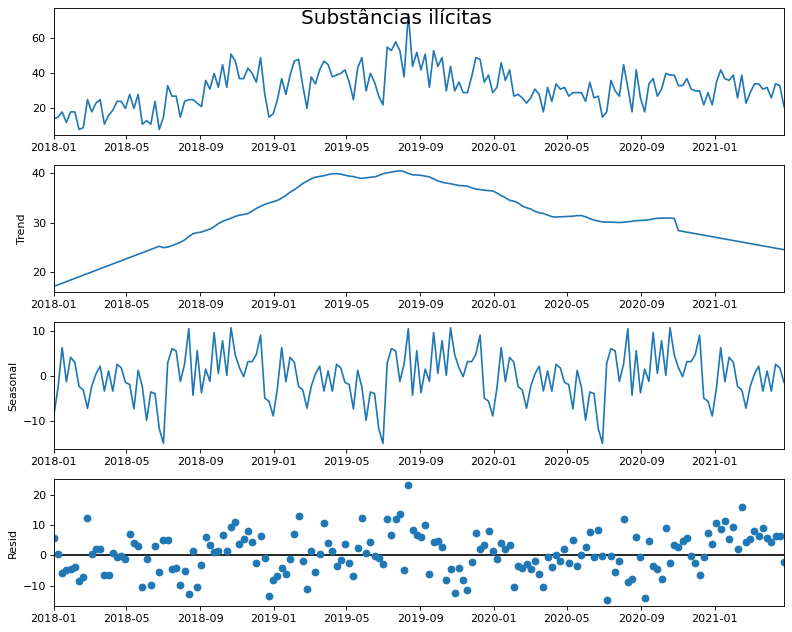

In [51]:

sub_ilicita_resultado = seasonal_decompose(df_sub_ilicita, model='additive', extrapolate_trend='freq')
sub_ilicita_resultado.plot().suptitle("Substâncias ilícitas", fontsize=18)
# plt.savefig("../resultados_iniciais/sub_ilicita_st_semana.png")
# plt.savefig("../resultados_iniciais/2015/sub_ilicita_st_semana_2015.png")
plt.tight_layout()
plt.show()

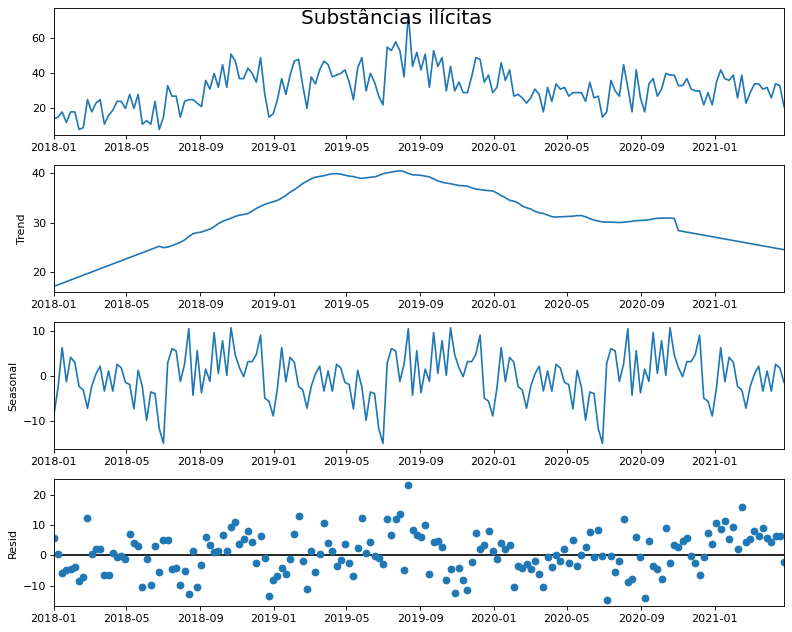

In [7]:
sub_ilicita_resultado = seasonal_decompose(df_sub_ilicita, model='additive', extrapolate_trend='freq')
sub_ilicita_resultado.plot().suptitle("Substâncias ilícitas", fontsize=18)
# plt.savefig("../resultados_iniciais/sub_ilicita_st_semana.png")
# plt.savefig("../resultados_iniciais/2015/sub_ilicita_st_semana_2015.png")
plt.tight_layout()
plt.show()

In [224]:
df_sub_ilicita_reconstruido = pd.concat([sub_ilicita_resultado.seasonal, sub_ilicita_resultado.trend, sub_ilicita_resultado.resid, sub_ilicita_resultado.observed], axis=1)
df_sub_ilicita_reconstruido.columns = ['seas', 'trend', 'resid', 'actual_values']
df_sub_ilicita_reconstruido.tail(20)

,seas,trend,resid,actual_values
OCORRENCIA_DATA,,,,
2020-12-14,-4.955458,27.428623,-0.473165,22.0
2020-12-21,-5.637830,27.273816,7.364014,29.0
2020-12-28,-8.922605,27.119010,3.803596,22.0
2021-01-04,-2.679500,26.964203,10.715297,35.0
2021-01-11,6.291970,26.809397,8.898634,42.0
2021-01-18,-1.279829,26.654590,11.625239,37.0
2021-01-25,4.141161,26.499783,5.359056,36.0
2021-02-01,3.018881,26.344977,9.636142,39.0
2021-02-08,-2.341380,26.190170,2.151210,26.0


# Roubo e Furto

In [52]:
roubo1= df[df['DESCRICAO1'] == 'Furto'] 
roubo2= df[df['DESCRICAO1'] == 'Roubo']
df_roubo = pd.concat([roubo1, roubo2])

print(len(roubo1), " total robo1")
print(len(roubo2), " total robo2")
print(len(df_roubo), " total df_roubo")

print(len(df_roubo)/40, " Por mes")

df_roubo = df_roubo[['OCORRENCIA_DATA', 'QTDE']]
df_roubo = df_roubo.groupby(periodo)['QTDE'].count().reset_index(name='count')
df_roubo = df_roubo.set_index('OCORRENCIA_DATA')
df_roubo.index = df_roubo.index.to_timestamp()
df_roubo

3067  total robo1
4163  total robo2
7230  total df_roubo
180.75  Por mes


,count
OCORRENCIA_DATA,
2018-01-01,30
2018-01-08,49
2018-01-15,50
2018-01-22,45
2018-01-29,47
...,...
2021-03-29,40
2021-04-05,42
2021-04-12,43


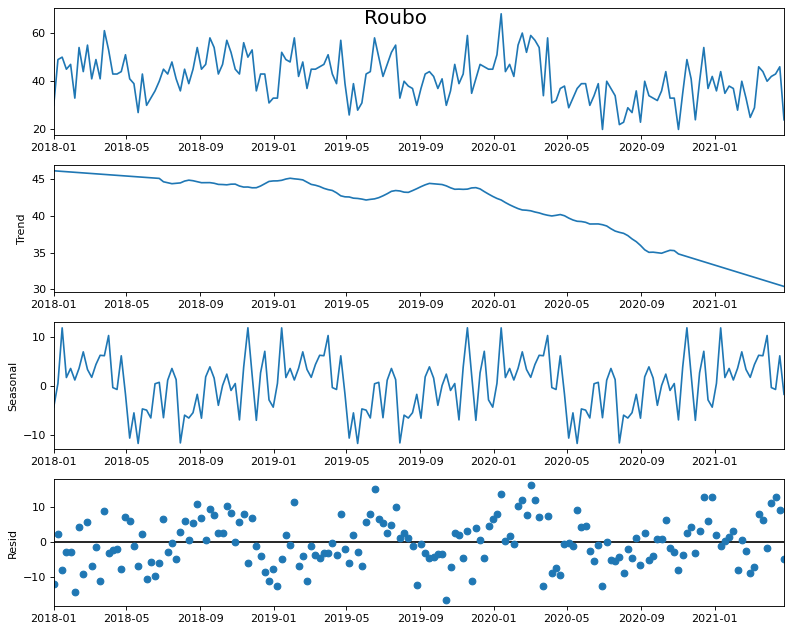

In [53]:
df_roubo_resultado = seasonal_decompose(df_roubo, model='additive', extrapolate_trend='freq')
df_roubo_resultado.plot().suptitle("Roubo", fontsize=18)
plt.savefig("../resultados_iniciais/roubo_st_semana.png")
# plt.savefig("../resultados_iniciais/2015/roubo_st_semana_2015.png")

# Violência doméstica

In [19]:

viol1= df[df['DESCRICAO1'] == 'Violação de Medida Protetiva Lei Maria da Penha'] 
viol2= df[df['DESCRICAO1'] == 'Ameaça']
viol3= df[df['DESCRICAO1'] == 'Importunação\xa0sexual']
viol4= df[df['DESCRICAO1'] == 'Estupro']
viol5= df[df['DESCRICAO1'] == 'Exploração de menores']
viol6= df[df['DESCRICAO1'] == 'Maus tratos à pessoas']
viol7= df[df['DESCRICAO1'] == 'Abuso de incapazes']
violencia = pd.concat([viol1, viol2, viol3, viol4, viol5, viol6, viol7])
violencia.groupby(violencia['DESCRICAO1'])['QTDE'].count().sort_values()

DESCRICAO1
Exploração de menores                                 8
Maus tratos à pessoas                                27
Abuso de incapazes                                   28
Estupro                                              51
Importunação sexual                                 329
Violação de Medida Protetiva Lei Maria da Penha    3015
Ameaça                                             4875
Name: QTDE, dtype: int64

In [18]:
print(len(violencia)/(42+36))

106.83333333333333


In [20]:

violencia = violencia[['OCORRENCIA_DATA', 'QTDE']]
violencia = violencia.groupby(periodo)['QTDE'].count().reset_index(name='count')
violencia = violencia.set_index('OCORRENCIA_DATA')
violencia.index = violencia.index.to_timestamp()
violencia

,count
OCORRENCIA_DATA,
2014-12-29,5
2015-01-05,29
2015-01-12,22
2015-01-19,26
2015-01-26,19
...,...
2021-03-29,25
2021-04-05,27
2021-04-12,30


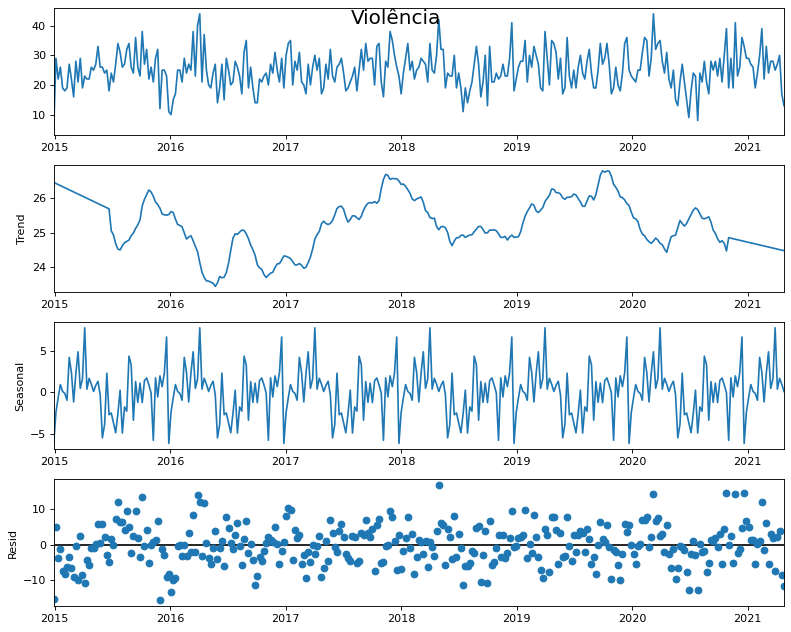

In [22]:
violencia_resultado = seasonal_decompose(violencia, model='additive', extrapolate_trend='freq')
violencia_resultado.plot().suptitle("Violência", fontsize=18)
plt.savefig("../resultados_iniciais/2015/violencia_domestica_st_semana_2015.png")
# plt.savefig("../resultados_iniciais/violencia_domestica_st_semana.png")